## Scope and Objective:

The client, a state-wide insurance marketplace, wants to maximize the enrollment of potential consumers who have started but not yet completed enrollment process by sending them targeted emails. The client wants an analysis of marketplace trends and consumer behaviour in order to identify demographics to be targeted. 

The metric I have chosen to track is **enrollment rate**. I will examine the data below to determine the key factors that impact this metric.

## Data Processing

In [1]:
#Load all packages and settings
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pd.set_option('display.float_format', lambda x: '%.2f' % x) 
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
#Import and preview the data
df = pd.read_excel("BlueLabs_crosstab.xlsx")
df.head()

,Unnamed: 0,Consumer Group,Consumer Subgroup,Unnamed: 3,Share of 2016 Applications Created,Share of 2017 Applications Created,Unnamed: 6,Share of 2016 Enrollments,Share of 2017 Enrollments
0,nan,Topline,Total,nan,3200000.00,2900000.00,nan,2100000.00,2000000.00
1,nan,1 - Prior Marketplace Experience,Has enrolled in past years,nan,0.61,0.56,nan,0.70,0.68
2,nan,NaN,Has never enrolled before,nan,0.39,0.44,nan,0.30,0.32
3,nan,2 - Age Bucket,Under 18,nan,0.13,0.14,nan,0.11,0.14
4,nan,NaN,18 to 34,nan,0.29,0.27,nan,0.28,0.24


In [3]:
#Drop columns that won't be used and reset the index to consumer subgroup
df = df.drop(['Unnamed: 0', 'Consumer Group', 'Unnamed: 3', 'Unnamed: 6'], axis=1)
df.set_index('Consumer Subgroup', inplace=True)
df.head()

,Share of 2016 Applications Created,Share of 2017 Applications Created,Share of 2016 Enrollments,Share of 2017 Enrollments
Consumer Subgroup,,,,
Total,3200000.00,2900000.00,2100000.00,2000000.00
Has enrolled in past years,0.61,0.56,0.70,0.68
Has never enrolled before,0.39,0.44,0.30,0.32
Under 18,0.13,0.14,0.11,0.14
18 to 34,0.29,0.27,0.28,0.24


In [4]:
#Create columns to reflect the number of applicants and enrollees for each year
for column in df:
    df['Number' + column[5:] + ' (000s)'] = df[column].apply(lambda x: (x*df.loc['Total', column])/1000)
df.head()

,Share of 2016 Applications Created,Share of 2017 Applications Created,Share of 2016 Enrollments,Share of 2017 Enrollments,Number of 2016 Applications Created (000s),Number of 2017 Applications Created (000s),Number of 2016 Enrollments (000s),Number of 2017 Enrollments (000s)
Consumer Subgroup,,,,,,,,
Total,3200000.00,2900000.00,2100000.00,2000000.00,10240000000.00,8410000000.00,4410000000.00,4000000000.00
Has enrolled in past years,0.61,0.56,0.70,0.68,1952.00,1624.00,1470.00,1360.00
Has never enrolled before,0.39,0.44,0.30,0.32,1248.00,1276.00,630.00,640.00
Under 18,0.13,0.14,0.11,0.14,416.00,406.00,231.00,280.00
18 to 34,0.29,0.27,0.28,0.24,928.00,783.00,588.00,480.00


In [5]:
#Calculate enrollment rate
df['2016 Enrollment Rate'] = (df['Number of 2016 Enrollments (000s)']/df['Number of 2016 Applications Created (000s)']).round(2)
df['2017 Enrollment Rate'] = (df['Number of 2017 Enrollments (000s)']/df['Number of 2017 Applications Created (000s)']).round(2)
df['Change in Enrollment Rate'] = (df['2017 Enrollment Rate'] - df['2016 Enrollment Rate']).round(2)

In [7]:
df

,Share of 2016 Applications Created,Share of 2017 Applications Created,Share of 2016 Enrollments,Share of 2017 Enrollments,Number of 2016 Applications Created (000s),Number of 2017 Applications Created (000s),Number of 2016 Enrollments (000s),Number of 2017 Enrollments (000s),2016 Enrollment Rate,2017 Enrollment Rate,Change in Enrollment Rate
Consumer Subgroup,,,,,,,,,,,
Total,3200000.00,2900000.00,2100000.00,2000000.00,10240000000.00,8410000000.00,4410000000.00,4000000000.00,0.43,0.48,0.05
Has enrolled in past years,0.61,0.56,0.70,0.68,1952.00,1624.00,1470.00,1360.00,0.75,0.84,0.09
Has never enrolled before,0.39,0.44,0.30,0.32,1248.00,1276.00,630.00,640.00,0.50,0.50,0.00
Under 18,0.13,0.14,0.11,0.14,416.00,406.00,231.00,280.00,0.56,0.69,0.13
18 to 34,0.29,0.27,0.28,0.24,928.00,783.00,588.00,480.00,0.63,0.61,-0.02
35 to 54,0.31,0.33,0.34,0.37,992.00,957.00,714.00,740.00,0.72,0.77,0.05
55 plus,0.24,0.21,0.27,0.25,768.00,609.00,567.00,500.00,0.74,0.82,0.08
Unknown Age,0.03,0.05,0.00,0.00,96.00,145.00,0.00,0.00,0.00,0.00,0.00
Female,0.53,0.52,0.55,0.55,1696.00,1508.00,1155.00,1100.00,0.68,0.73,0.05


## Findings

Text(0.5, 1.0, 'Average Enrollment Rate by Consumer Subgroup')

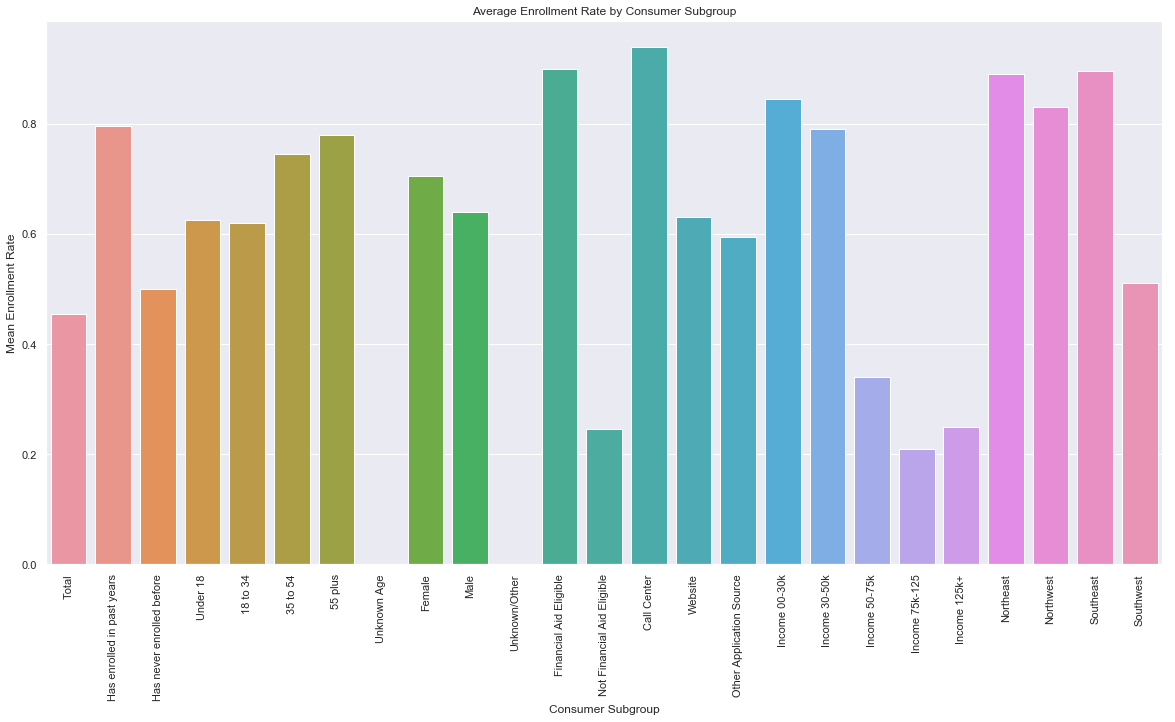

In [8]:
#Visualization of average enrollment rate by consumer subgroup
#Calculate mean enrollment and assign to new dataframe
mean_enrollment = pd.DataFrame(df[["2016 Enrollment Rate", "2017 Enrollment Rate"]].mean(axis=1))
mean_enrollment.columns = ["Mean Enrollment Rate"]
mean_plot = sns.barplot(df.index, "Mean Enrollment Rate", data=mean_enrollment).set_xticklabels(df.index,rotation=90)
plt.title("Average Enrollment Rate by Consumer Subgroup")

Text(0.5, 1.0, 'Changes in Enrollment Rate by Consumer Subgroup (2016 - 2017)')

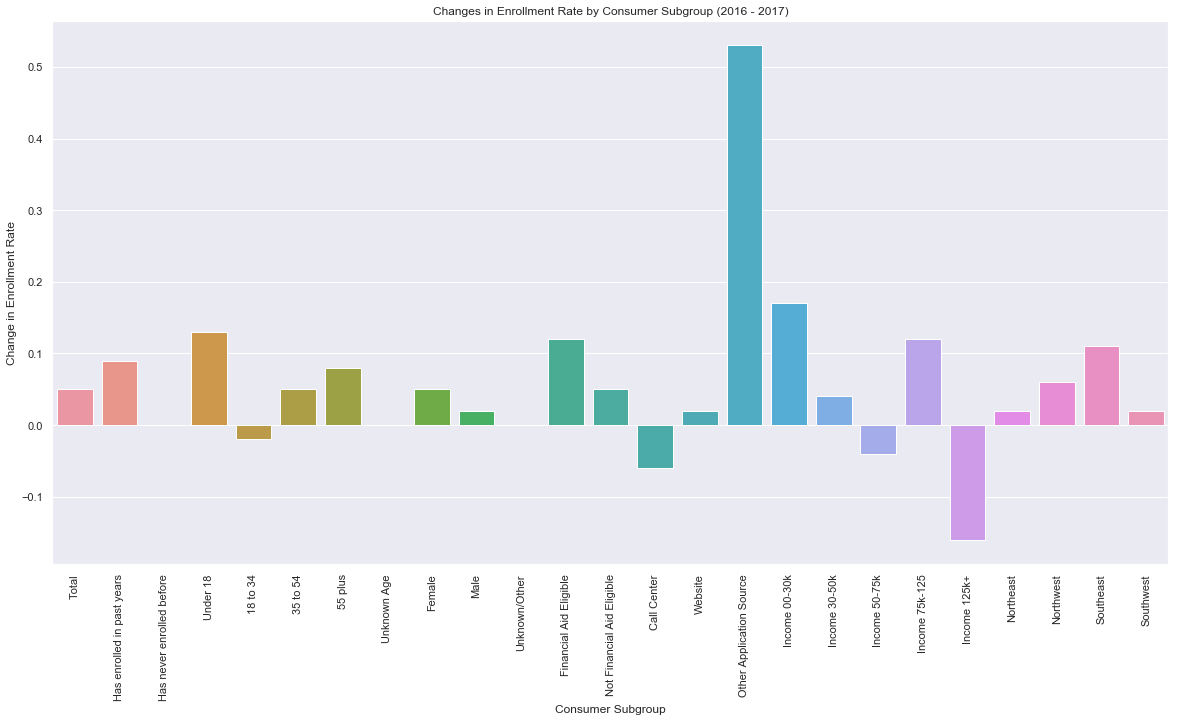

In [9]:
#Show changes in enrollment rate by consumer subgroup
enrollment_change = sns.barplot(df.index, "Change in Enrollment Rate", data=df).set_xticklabels(df.index,rotation=90)
plt.title("Changes in Enrollment Rate by Consumer Subgroup (2016 - 2017)")

* Although the number of applications and enrollments fell by 9% and 5% respectively in 2017, the total enrollment rate actually rose by 3% from 66% to 69%.

Text(0.5, 1.0, 'Has enrolled in past years vs. Has never enrolled')

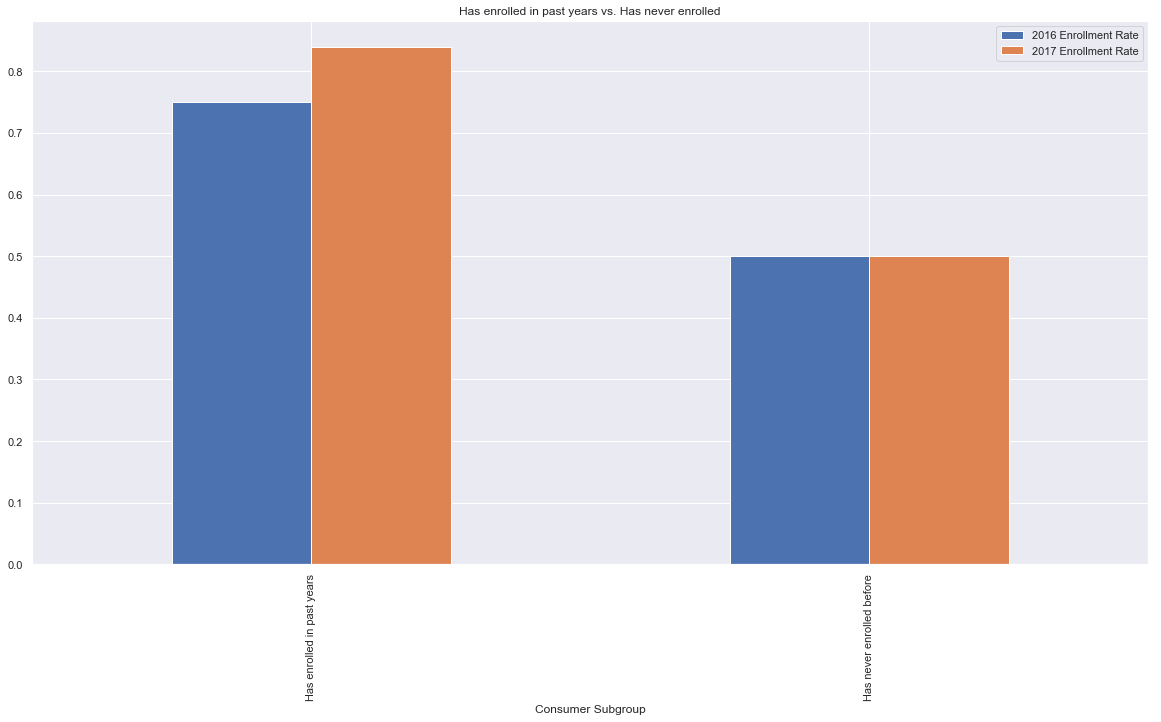

In [11]:
# create plots for individual consumer groups
df.loc["Has enrolled in past years":"Has never enrolled before", "2016 Enrollment Rate":"2017 Enrollment Rate"].plot(kind="bar")
plt.title("Has enrolled in past years vs. Has never enrolled")

* The enrollment rate for reenrollees or consumers with previous experience (84%) is almost twice as much that of new enrollees (50%). This suggests a divergence in  user experience and health insurance literacy, which also suggests that they are key drivers in enrollment. 
* I would like to further investigate how the enrollment process differs for returning enrollees. Is their reenrollment automatic or do they also have to apply again each year? Does the system save their information from the year before? If so, that would simplify their process considerably. 

Text(0.5, 1.0, 'Enrollment Rate by Age Bucket')

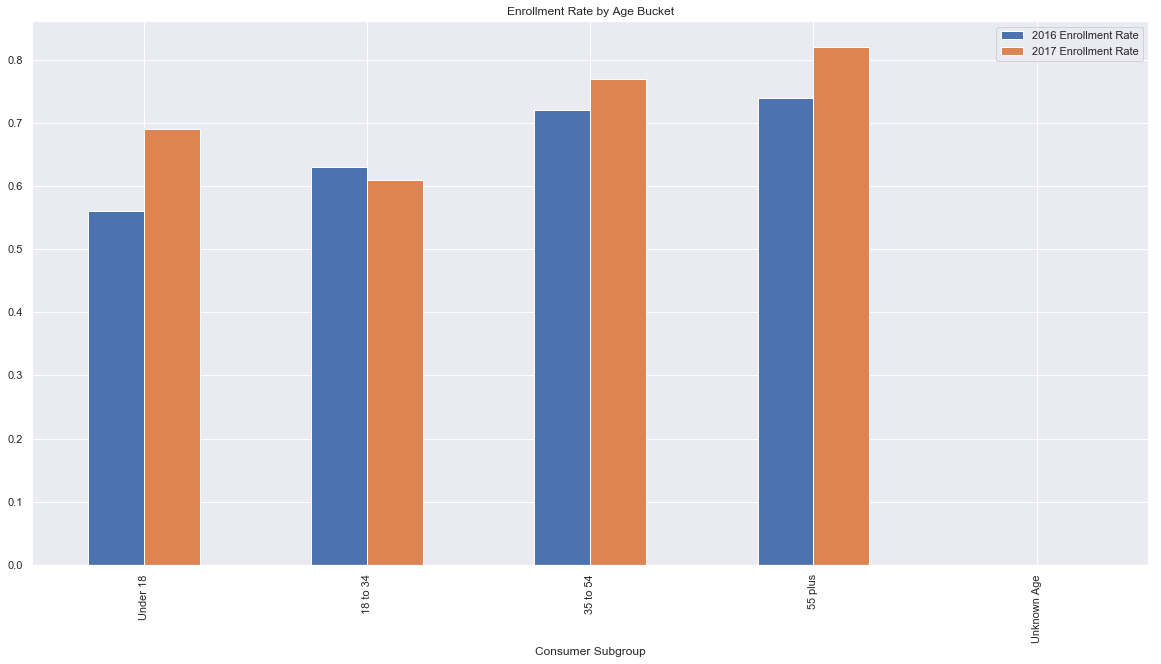

In [12]:
# create plots for individual consumer groups
df.loc["Under 18":"Unknown Age", "2016 Enrollment Rate":"2017 Enrollment Rate"].plot(kind="bar")
plt.title("Enrollment Rate by Age Bucket")

* In 2016, enrollment rate rose as consumer age did but in 2017 the 18-34 age bucket surprisingly fell. 
* Older people, 55+ would be more concerned about their healthcare and so it makes sense that their rates are the highest.

Text(0.5, 1.0, 'Enrollment Rate by Aid Eligibility')

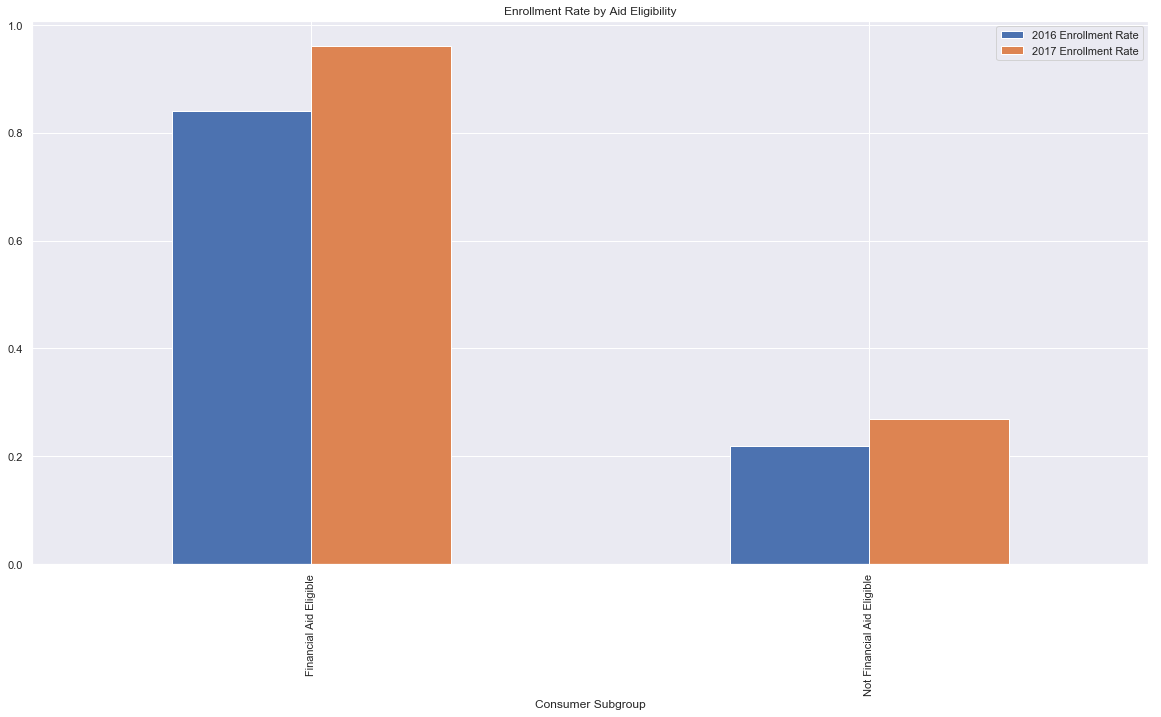

In [24]:
# create plots for individual consumer groups
df.loc["Financial Aid Eligible":"Not Financial Aid Eligible", "2016 Enrollment Rate":"2017 Enrollment Rate"].plot(kind="bar")
plt.title("Enrollment Rate by Aid Eligibility")

* It is clear from the chart that those with financial aid are significantly more likely to complete enrollment.
* This suggests that cost of coverage is a key driver of enrollment.
* However it should be pointed out that the number of applicants and enrollees who did not have financial aid rose in 2017 despite their lack of aid whilst the numbers for those with financial aid fell. 

In [15]:
df.loc["Financial Aid Eligible":"Not Financial Aid Eligible", "Number of 2016 Applications Created (000s)":"Number of 2017 Enrollments (000s)"]

,Number of 2016 Applications Created (000s),Number of 2017 Applications Created (000s),Number of 2016 Enrollments (000s),Number of 2017 Enrollments (000s)
Consumer Subgroup,,,,
Financial Aid Eligible,2240.00,1769.00,1890.00,1700.00
Not Financial Aid Eligible,960.00,1131.00,210.00,300.00


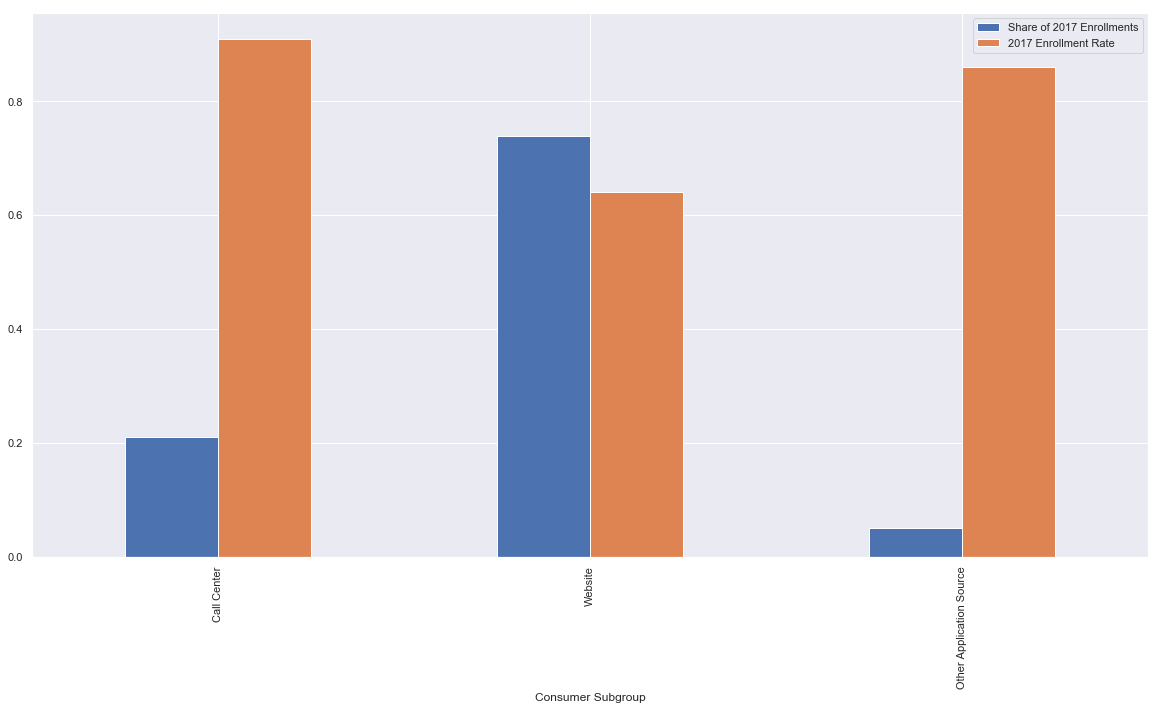

In [19]:
#Enrollment by application source
df.loc["Call Center":"Other Application Source",["Share of 2017 Enrollments", "2017 Enrollment Rate"]].plot(kind="bar")

* While it may seem like the website has a larger share of applicants and enrollees, it is not the most effective application source. In fact in 2017 only 64% of website applicants actually enrolled compared to 91% of call center applicants and 86% of applicants from other sources
* This is most likely because it is far easier to complete an application with the help of a professional guiding a consumer through the process.
* It should also be noted that there was a sharp rise (53%) in the enrollment rate through other application sources in 2017. Assuming the other application source involves in-person assistance it would also lend weight to the theory that consumers prefer to have help when enrolling.
* I would also like to investigate at which stage most website customers abandon their application as that might point to where the biggest knowledge gap exists for consumers.

Text(0.5, 1.0, 'Applications and Enrollment by Income')

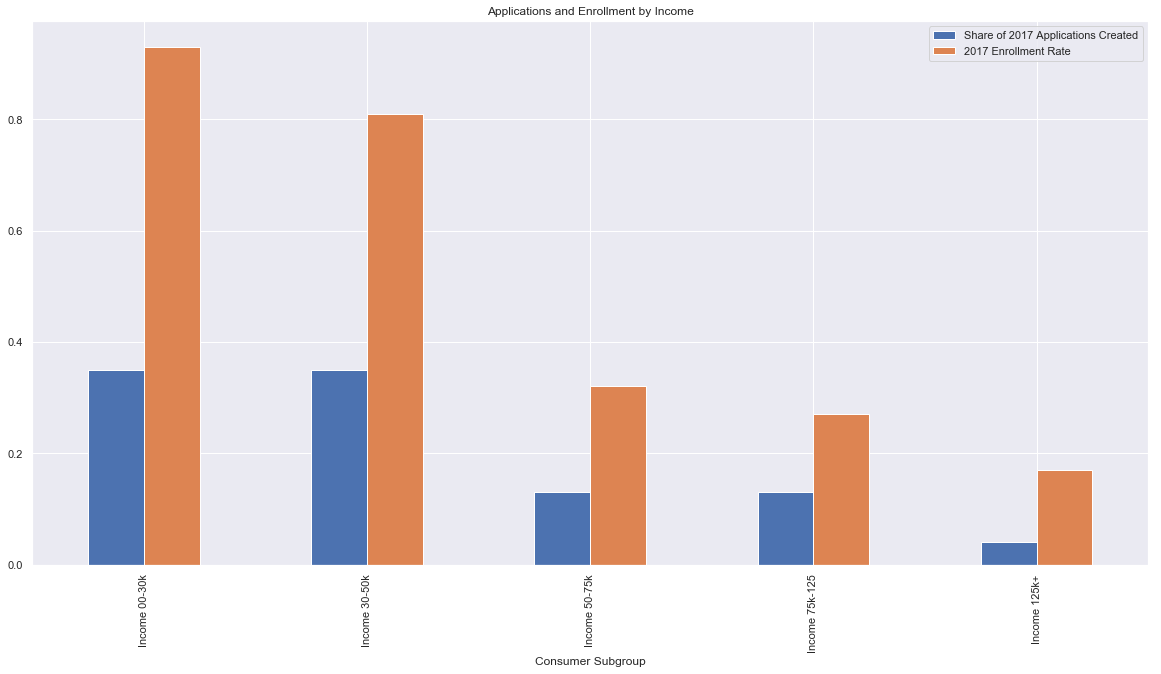

In [22]:
# create plots for individual consumer groups
df.loc["Income 00-30k":"Income 125k+", ["Share of 2017 Applications Created","2017 Enrollment Rate"]].plot(kind="bar")
plt.title("Applications and Enrollment by Income")

* It makes sense that as income rises, the share of applications and enrollment rate falls. This is because, lower income individuals are more likely to be eligible for aid which helps offset the cost of premiums. Also, in terms of population distribution there are significantly fewer people earning above 125,000 dollars.
* This again suggests that cost of coverage is a key determinant in enrollment

Text(0.5, 1.0, 'Applications and Enrollment by Region')

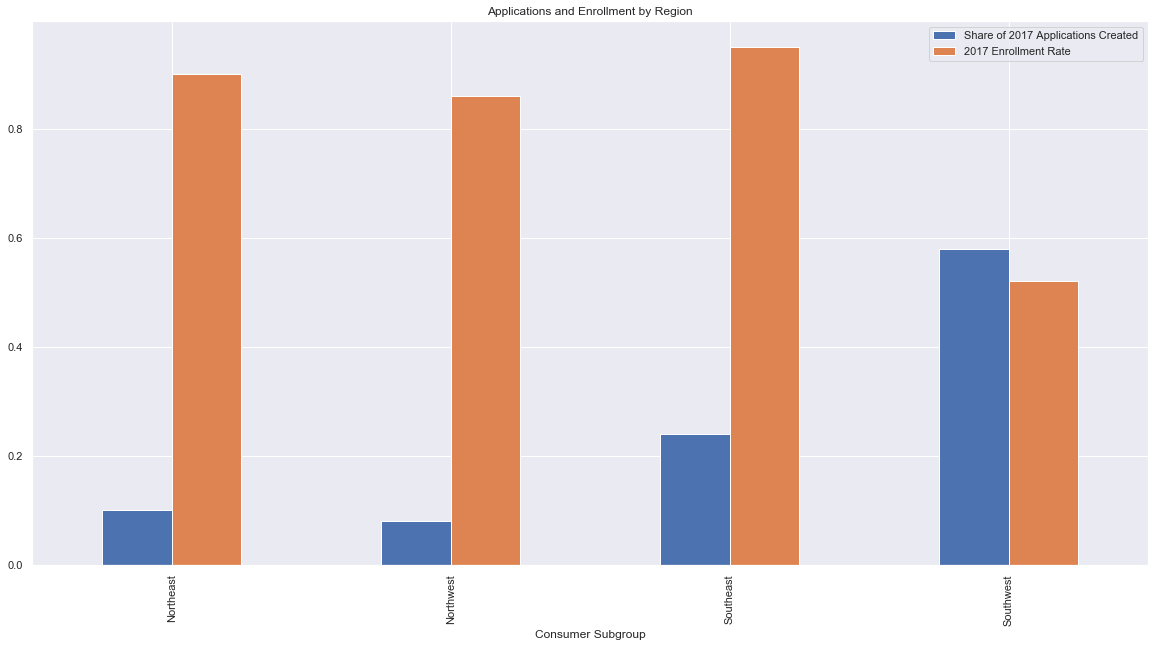

In [23]:
df.loc["Northeast":"Southwest", ["Share of 2017 Applications Created","2017 Enrollment Rate"]].plot(kind="bar")
plt.title("Applications and Enrollment by Region")

* A surprising finding that needs further investigation was that although the Southwest created the most applications when it came down to enrollment, they had the lowest rate.
* One theory could be that the southwest is more affluent and so fewer applicants were eligible for subsidies. This could be tested by examining the median income for each region.

## Recommendations:

The data suggests that cost of coverage, health insurance literacy and familiarity with the application process are key determinants in whether a consumer will enroll. Therefore it is my recommendation that the client should target the following consumers:

 * Those eligible for financial aid who are not aware of this eligiblity.
 
 * Consumers who've never enrolled. These customers could be sent information that will simplify their application process or even be asked to choose a data and time for a phone call from an insurance agent to walk them through the application.
 
 * The 18-34 demographic because although they may not value healthcare as much because of the youth they could potentially benefit from financial aid because they are most likely earning less than their older counterparts.
 
 * Website applicants should be targeted as well with scheduling emails and/or information related to the stage at which they abandoned their application, this will facilitate their application process and address any knowledge gaps they may have. 
